# 1. Introducción al Aprendizaje por Refuerzo (Reinforcement Learning)

### 1.1 Los campos del Machine Learning

Existen 3 grandes campos:

- **Aprendizaje no Supervisado**: tenemos datos pero **NO** sabemos a qué grupo pertenece cada dato.
- **Aprendizaje Supervisado**: tenemos datos y **SÍ** sabemos a qué grupo pertenece cada dato (etiquetas).
- **Aprendizaje por Refuerzo**: no tenemos datos, los datos se obtienen explorando un entorno.


![esquema_ML](https://la.mathworks.com/discovery/reinforcement-learning/_jcr_content/mainParsys3/discoverysubsection/mainParsys/image.adapt.full.medium.png/1630398182247.png)

### 1.2 Reinforcement Learning

![Reinforcement Learning simple schema](https://la.mathworks.com/discovery/reinforcement-learning/_jcr_content/mainParsys3/discoverysubsection_603098216/mainParsys3/image.adapt.full.medium.png/1630398182451.png)

#### CICLO DE APRENDIZAJE   

1. El **agente** obtiene unas **observaciones** del entorno
2. En función a esas **observaciones** decide realizar una **acción**
3. Esa **acción** le lleva a obtener una **recompensa** y nuevas **observaciones**
4. Vuelve al paso 2.

#### ¿Cual sería el Agente, el entorno, las acciones, la recompensa y las observaciones en este clásico ejemplo?

![mice in a maze](https://user-images.githubusercontent.com/44867923/139915800-8224bede-c52b-47d1-bb22-2e9624687831.jpg)

### 1.3 Obtener datos: Equilibrio entre exploración y explotación

1. Te acabas de mudar. No conoces nada de tu barrio.
2. Tienes hambre (**recompensa** negativa) y quieres comer.
3. Observas que existen varios restaurantes en tu calle (**observaciones**)
4. Eliges un restaurante (tomas una **acción**), no conoces ninguno asi que cómo lo haces? **De forma aleatoria**
5. Te gusta (**recompensa positiva**) y repites porque vas a lo seguro (**Explotación**).
6. Cierto día decides arriesgar con un nuevo sitio (**Exploración**).
7. Puede ser que te guste más y vuelvas (**Explotación**) o puede ser que no te guste y pruebes nuevos sitios (**Exploración**) o vuelvas al anterior (**Explotación**).

![explotationvsexploration](https://steemitimages.com/640x0/https://steemitimages.com/DQmXH5tjBiS41iNtcyvh7s7Rj5z3SqGkcwoaV2otRJNx3FT/Exploration_vs._Exploitation.png)

### 1.4 Objetivo del RL: Maximizar la recompensa a largo plazo

1. Madrugas (recompensa negativa)
2. Vas a clase, *con una asignatura aburrida* (recompensa negativa)
3. Te fuerzas a estudiar cientos de diapositivas con mucho texto (recompensa negativa).
4. ¿Por qué? -> **Para maximizar la recompensa a largo plazo**.
4. Si estudio, trabajaré en lo que me gusta. (recompensa positiva).
6. Puedo aspirar a trabajos mejor remunerados (recompensa positiva).
7. Con ese dinero puedo vivir en mejores condiciones(recompensa positiva).

#### Exploración vs. Explotación

Supongamos que se desea enseñar al gato Bob a utilizar varios rascadores en una habitación en lugar de usar los muebles. Por tanto, Bob es el agente, el que aprende y el que toma las decisiones. Tiene que aprender qué cosas puede arañar (alfombras y postes) y cuáles no (sofás y cortinas).   

Como un hábil jugador de ajedrez, nuestro agente buscará las recompensas más gratificantes. Esto pone de manifiesto un dilema clásico en el aprendizaje por refuerzo: **exploración** frente a **explotación**.

Mientras que un puesto tentador puede ofrecer una gratificación inmediata, una exploración más estratégica podría conducir a un premio gordo más adelante. Al igual que un jugador de ajedrez puede renunciar a una captura para obtener una posición superior, nuestro agente puede optar inicialmente por un puesto subóptimo (exploración) para descubrir el refugio definitivo para rascar (explotación). Esta estrategia a largo plazo es crucial para que los agentes maximicen las recompensas en entornos complejos.

En otras palabras, Bob debe equilibrar la **explotación** (ceñirse a lo que funciona mejor) con la **exploración** (aventurarse de vez en cuando a buscar nuevos rascadores). Explorar demasiado puede hacerle perder tiempo, sobre todo en entornos continuos, mientras que explotar demasiado puede hacer que Bob se pierda algo aún mejor.

Por suerte, Bob puede adoptar algunas estrategias inteligentes:

- *Aprendizaje Epsilon-greedy (voraz)*: Imaginemos por un momento que Bob tiene un "rascador-metro" especial que genera números aleatorios. Si el número generado es menor que algún umbral predefinido llamado épsilon, Bob prueba una superficie de rascado aleatoria (exploración). Pero si el número es mayor que épsilon, Bob va a por el puesto que mejor le parecía antes (explotación).
- *Exploración de Boltzmann*: Si Bob sigue rascando cosas que no le parecen bien (obteniendo recompensas negativas), es más probable que explore nuevas opciones (aumento de la exploración). Pero cuando encuentre el rascador perfecto (recompensas positivas), se quedará en ese lugar feliz (explotación).   

Utilizando estas estrategias (u otras), Bob puede encontrar un equilibrio entre explorar lo desconocido y ceñirse a lo bueno (explotar).

### 1.5 Reinforcement Learning en la pŕactica

[Interesante documental sobre AlphaGo](https://www.youtube.com/watch?v=GIJ7zr4sYx4)

#### Importar librerías

Instalación de las siguientes librerías:    

- ```pip install swig```     
- ```pip install gymnasium[box2d]```

In [31]:
import gymnasium as gym

In [32]:
import random
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import time

#### Funciones para mostrar correctamente el entorno 

In [33]:
# Función para obtener la imagen del entorno correctamente
def get_frame(env):
    frame = env.render()
    if isinstance(frame, dict):  # Algunas versiones de gymnasium devuelven un dict
        return frame["pixels"]
    return frame

#### Creación del entorno y juego aleatorio

In [34]:
# Lista de entornos
ENV_NAMES = ["MountainCar-v0", "LunarLander-v3", "CarRacing-v3", "BipedalWalker-v3", "CartPole-v1"]

In [35]:
import random
# Seleccionar un entorno aleatorio
env_name = random.choice(ENV_NAMES)

print(f"Entorno seleccionado: {env_name}")

Entorno seleccionado: MountainCar-v0


In [36]:
if env_name == "CartPole-v1":
    env = gym.make(env_name, render_mode="rgb_array", continuous=True)  
    # el parámetro continuous es necesario para CarRacing, para que acepte acciones continuas.
    env = gym.make(env_name, render_mode="rgb_array")


### Renderizado

In [37]:
# Inicializar render
if env_name == "CartPole-v1":
	env = gym.make(env_name, render_mode="rgb_array")
else:
	env = gym.make(env_name, render_mode="rgb_array")
obs, _ = env.reset()
done = False

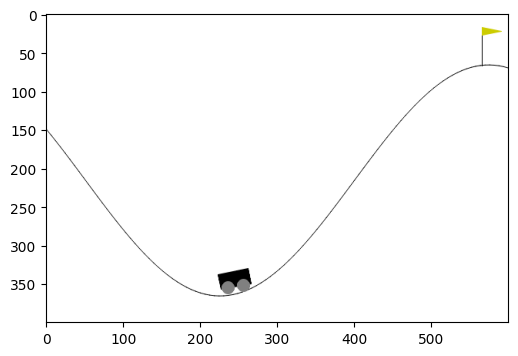

In [ ]:
# Configurar la visualización inicial
plt.figure(figsize=(6, 4))
img = plt.imshow(get_frame(env))  # Renderizar primer frame


# Jugar una partida con una política aleatoria
while not done:
    action = env.action_space.sample()  # Selecciona una acción aleatoria
    obs, reward, done, _, _ = env.step(action)  # Ejecutar acción

    # Actualizar la imagen en Jupyter Notebook
    img.set_data(get_frame(env))
    display(plt.gcf())
    clear_output(wait=True)

    time.sleep(0.005)  # Pausa para mejor visualización

env.close()
print(f"Juego finalizado en {env_name}")